# Iris 데이터 군집 실습
#### 작성: 고우주 | kubwa 쿱와

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
X = iris.data
Y = iris.target
Y_name = iris.target_names

- class sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)[source]¶

## 1. k-means clustering

In [4]:
# Make Kmeans model
kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                verbose=1)

# Fit the data
kmeans.fit(X)

# Get cluster indices
idx = kmeans.predict(X)

# Get distances to each centroids (cluster centers)
dist = kmeans.transform(X)

# Get centroid vectors
centers = kmeans.cluster_centers_

Initialization complete
Iteration 0, inertia 148.77000000000004
Iteration 1, inertia 92.15602067843487
Iteration 2, inertia 83.68889915499041
Iteration 3, inertia 79.86398439527464
Iteration 4, inertia 79.19714263977781
Iteration 5, inertia 78.851441426146
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 115.86000000000001
Iteration 1, inertia 87.1881207470267
Iteration 2, inertia 84.71232984452898
Iteration 3, inertia 84.0127788886515
Iteration 4, inertia 83.04698186876972
Iteration 5, inertia 81.74960206772624
Iteration 6, inertia 80.80637599999999
Iteration 7, inertia 79.87357983461304
Iteration 8, inertia 79.34436414532675
Iteration 9, inertia 78.92130972222225
Iteration 10, inertia 78.85566582597727
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 105.63000000000001
Iteration 1, inertia 81.60656213690037
Iteration 2, inertia 80.80637599999999
Iteration 3, inertia 79.87357983461304
Iteration 4, ine

In [5]:
# Cluster indices
idx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [6]:
# Distances to each centroids (cluster centers)
dist

array([[0.14135063, 3.41925061, 5.0595416 ],
       [0.44763825, 3.39857426, 5.11494335],
       [0.4171091 , 3.56935666, 5.27935534],
       [0.52533799, 3.42240962, 5.15358977],
       [0.18862662, 3.46726403, 5.10433388],
       [0.67703767, 3.14673162, 4.68148797],
       [0.4151867 , 3.51650264, 5.21147652],
       [0.06618157, 3.33654987, 5.00252706],
       [0.80745278, 3.57233779, 5.32798107],
       [0.37627118, 3.3583767 , 5.06790865],
       [0.4824728 , 3.32449131, 4.89806763],
       [0.25373214, 3.31126872, 4.9966845 ],
       [0.50077939, 3.46661272, 5.19103612],
       [0.91322505, 3.90578362, 5.65173594],
       [1.01409073, 3.646649  , 5.10804455],
       [1.20481534, 3.49427881, 4.88564095],
       [0.6542018 , 3.495248  , 5.03090587],
       [0.1441527 , 3.38444981, 5.02342022],
       [0.82436642, 3.11245944, 4.61792995],
       [0.38933276, 3.37738931, 4.97213426],
       [0.46344363, 3.07471224, 4.6955761 ],
       [0.3286031 , 3.31506588, 4.9236821 ],
       [0.

In [7]:
# Centroid vectors
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 2. Evaluate the result

### 참고: Clustering metrics in `scikit-learn`
- http://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

The `sklearn.metrics.cluster` submodule contains evaluation metrics for cluster analysis results. There are two forms of evaluation:

1. supervised, which uses a ground truth class values for each sample.
2. unsupervised, which does not and measures the ‘quality’ of the model itself.

우리는 iris dataset에 클래스가 3개라는 것을 알고 있습니다. 이에 **k=3** 외에 다른 **k**를 시도해보고, 결과를 평가해봅시다. 

In [9]:
k_set = [2, 3, 4, 5]
names = []
models = []
results = []

for k in k_set:
    names.append('KMeans_with_k=%d' % k)
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1234)
    model.fit(X)
    models.append(model)
    results.append(model.predict(X))

In [10]:
names

['KMeans_with_k=2', 'KMeans_with_k=3', 'KMeans_with_k=4', 'KMeans_with_k=5']

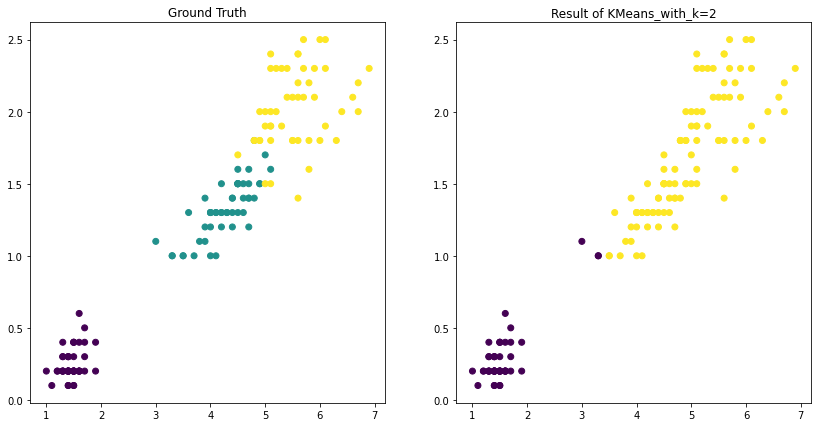

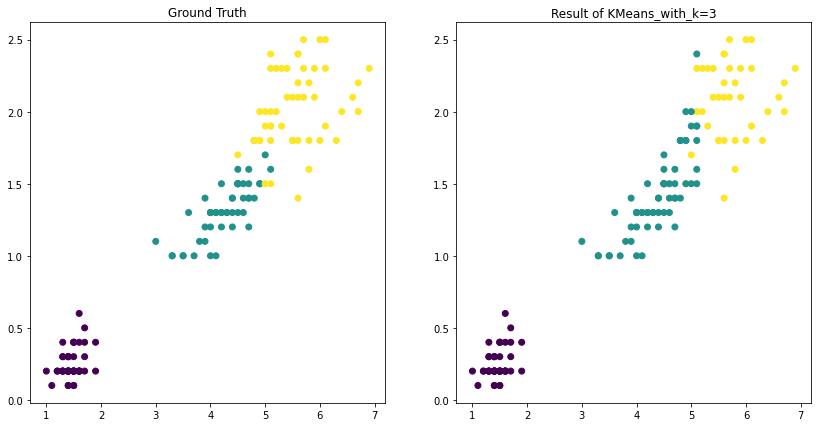

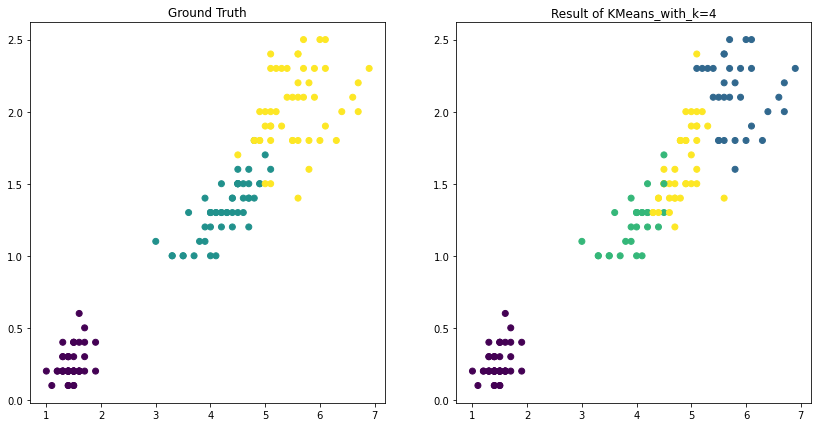

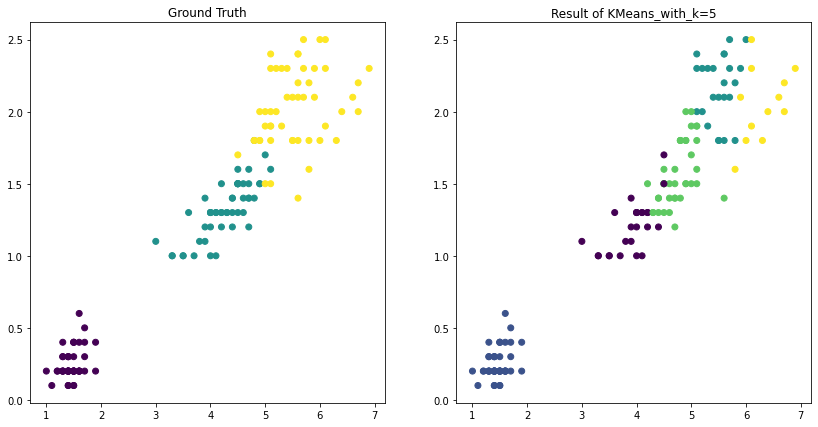

In [11]:
for k, name, result in zip(k_set, names, results):
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 1)
    # Scatter plot between 'Petal Length' and 'Petal Width'
    plt.scatter(X[:, 2], X[:, 3], c=Y)
    plt.title('Ground Truth')
    
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 2], X[:, 3], c=result)
    plt.title('Result of %s' % name)
    
    plt.show()

### 1) Accuracy(?)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
for name, result in zip(names, results):
    cm = confusion_matrix(Y, result)
    accuracy = accuracy_score(Y, result)
    print('** %s **' % name)
    print('accuracy: %.4f' % accuracy)
    print(cm)
    print()

** KMeans_with_k=2 **
accuracy: 0.6467
[[50  0  0]
 [ 3 47  0]
 [ 0 50  0]]

** KMeans_with_k=3 **
accuracy: 0.8933
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

** KMeans_with_k=4 **
accuracy: 0.3400
[[50  0  0  0]
 [ 0  0 26 24]
 [ 0 32  1 17]
 [ 0  0  0  0]]

** KMeans_with_k=5 **
accuracy: 0.1600
[[ 0 50  0  0  0]
 [24  0  0 26  0]
 [ 1  0 24 13 12]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]



### 2) Mutual information

In [14]:
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score
# adjusted_mutual_info_score 사용 권장

In [15]:
for name, result in zip(names, results):
    mi = mutual_info_score(Y, result)
    ami = adjusted_mutual_info_score(Y, result)
    print('** %s **' % name)
    print('mutual information score: %.4f' % mi)
    print('adjusted mutual information score: %.4f' % ami)
    print()

** KMeans_with_k=2 **
mutual information score: 0.5738
adjusted mutual information score: 0.6538

** KMeans_with_k=3 **
mutual information score: 0.8256
adjusted mutual information score: 0.7551

** KMeans_with_k=4 **
mutual information score: 0.8846
adjusted mutual information score: 0.7152

** KMeans_with_k=5 **
mutual information score: 0.9051
adjusted mutual information score: 0.6872



### 3) V-measure
V-measure는 homogeneity와 completeness로 계산이 됨.

In [16]:
from sklearn.metrics import homogeneity_completeness_v_measure

In [17]:
for name, result in zip(names, results):
    hm, cp, v_measure = homogeneity_completeness_v_measure(Y, result)
    print('** %s **' % name)
    print('homogeneity score: %.4f' % hm)
    print('completeness score: %.4f' % cp)
    print('v-measure: %.4f' % v_measure)
    print()

** KMeans_with_k=2 **
homogeneity score: 0.5223
completeness score: 0.8835
v-measure: 0.6565

** KMeans_with_k=3 **
homogeneity score: 0.7515
completeness score: 0.7650
v-measure: 0.7582

** KMeans_with_k=4 **
homogeneity score: 0.8052
completeness score: 0.6510
v-measure: 0.7199

** KMeans_with_k=5 **
homogeneity score: 0.8239
completeness score: 0.5993
v-measure: 0.6939



### 4) Silhouette measure

`scikit-plot`이라는 패키지를 설치합시다.
- 참고: https://github.com/reiinakano/scikit-plot

In [21]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [22]:
import scikitplot as skplt
from sklearn.metrics import silhouette_score

KMeans_with_k=2: silhouette score = 0.6810
KMeans_with_k=3: silhouette score = 0.5528
KMeans_with_k=4: silhouette score = 0.4975
KMeans_with_k=5: silhouette score = 0.4887


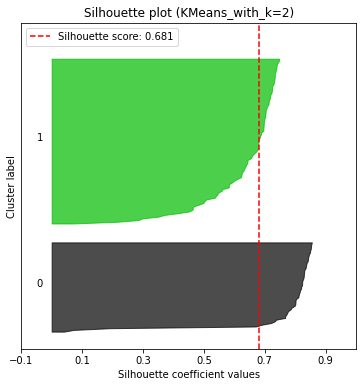

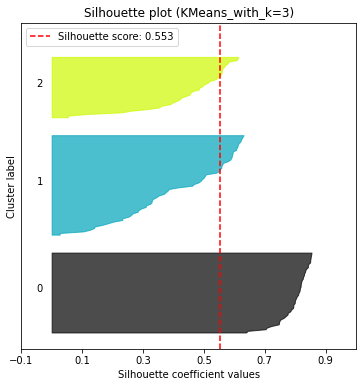

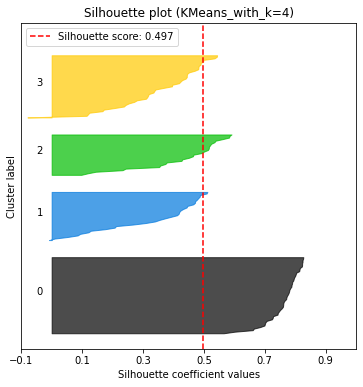

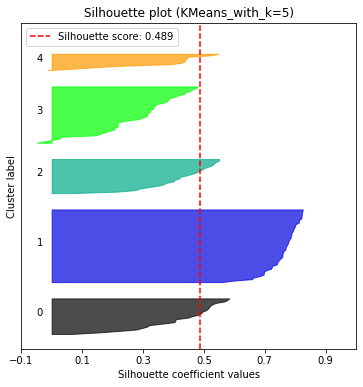

In [23]:
# Silhouette score
for name, result in zip(names, results):
    sil_score = silhouette_score(X, result)
    print('%s: silhouette score = %.4f' % (name, sil_score))
    
    # Silhouette plot
    # https://github.com/reiinakano/scikit-plot/blob/master/scikitplot/metrics.py
    skplt.metrics.plot_silhouette(X, result,
                                  title='Silhouette plot (%s)' % name,
                                  cmap='nipy_spectral',
                                  figsize=(6, 6))

### 5) Inertia
- Sum of squared distance for each sample to its closest centroid

In [24]:
for name, model in zip(names, models):
    inertia = model.inertia_
    print('%s: inertia = %.4f' % (name, inertia))

KMeans_with_k=2: inertia = 152.3480
KMeans_with_k=3: inertia = 78.8514
KMeans_with_k=4: inertia = 57.2560
KMeans_with_k=5: inertia = 46.4462
